In [40]:
import os
import glob
import pandas as pd
import seaborn as sns 

sns.set_theme(style="ticks")

In [20]:
class Reader:
    def __init__(self,dir) -> None:
        self.root_dir = dir
        
    def load_dbs(self, dbs_names):
        return {name : pd.read_csv(os.path.join(self.root_dir,name,"df.csv"),delimiter=",") for name in dbs_names}
    
    def report(self):
        print(os.listdir(self.root_dir))

In [106]:
root = os.path.join(os.getenv('DATA_DIR'),'databases')
names_dbs = ['social',
             'facebook']

# Read data frames
reader = Reader(root)
dbs = reader.load_dbs(['social','facebook'])
df = pd.concat(dbs,names=['Type','Row'])
df.reset_index(inplace=True)
df.drop(columns=['Row'],inplace=True)
df

,Type,Graph Name,num_vertices,num_edges,degree_max,degree_avg,assortativity_coeff,num_triangles,avg_num_triangles,max_triangles_per_edge,clustering_local_avg,clustering_global,max_k_core,low_max_clique,size
0,social,soc-pages-artist,51000.0,819000.0,1000.0,32.0,-0.02,7000000.0,135.0,27000.0,0.14,0.05,70.0,9.0,4000000.0
1,social,soc-pages-company,14000.0,52000.0,215.0,7.0,0.01,168000.0,11.0,806.0,0.24,0.15,21.0,12.0,472000.0
2,social,soc-pages-food,620.0,2000.0,132.0,6.0,-0.03,9000.0,14.0,461.0,0.33,0.22,12.0,10.0,19000.0
3,social,soc-pages-government,7000.0,89000.0,697.0,25.0,0.03,2000000.0,222.0,13000.0,0.41,0.22,47.0,14.0,467000.0
4,social,soc-pages-media,28000.0,206000.0,678.0,14.0,0.02,1000000.0,41.0,2000.0,0.30,0.11,32.0,14.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,facebook,f socfb-Yale4,9000.0,405000.0,3000.0,94.0,0.02,11000000.0,1000.0,90000.0,0.23,0.15,84.0,10.0,1000000.0
187,facebook,f socfb-konect,59000000.0,93000000.0,5000.0,3.0,-0.29,19000000.0,NaN,8000.0,0.04,0.00,17.0,6.0,286000000.0
188,facebook,f socfb-nips-ego,3000.0,3000.0,769.0,2.0,-0.67,273.0,NaN,52.0,0.03,0.00,4.0,4.0,12000.0
189,facebook,f socfb-uci-uni,59000000.0,92000000.0,5000.0,3.0,-0.29,19000000.0,NaN,8000.0,0.04,0.00,17.0,6.0,376000000.0


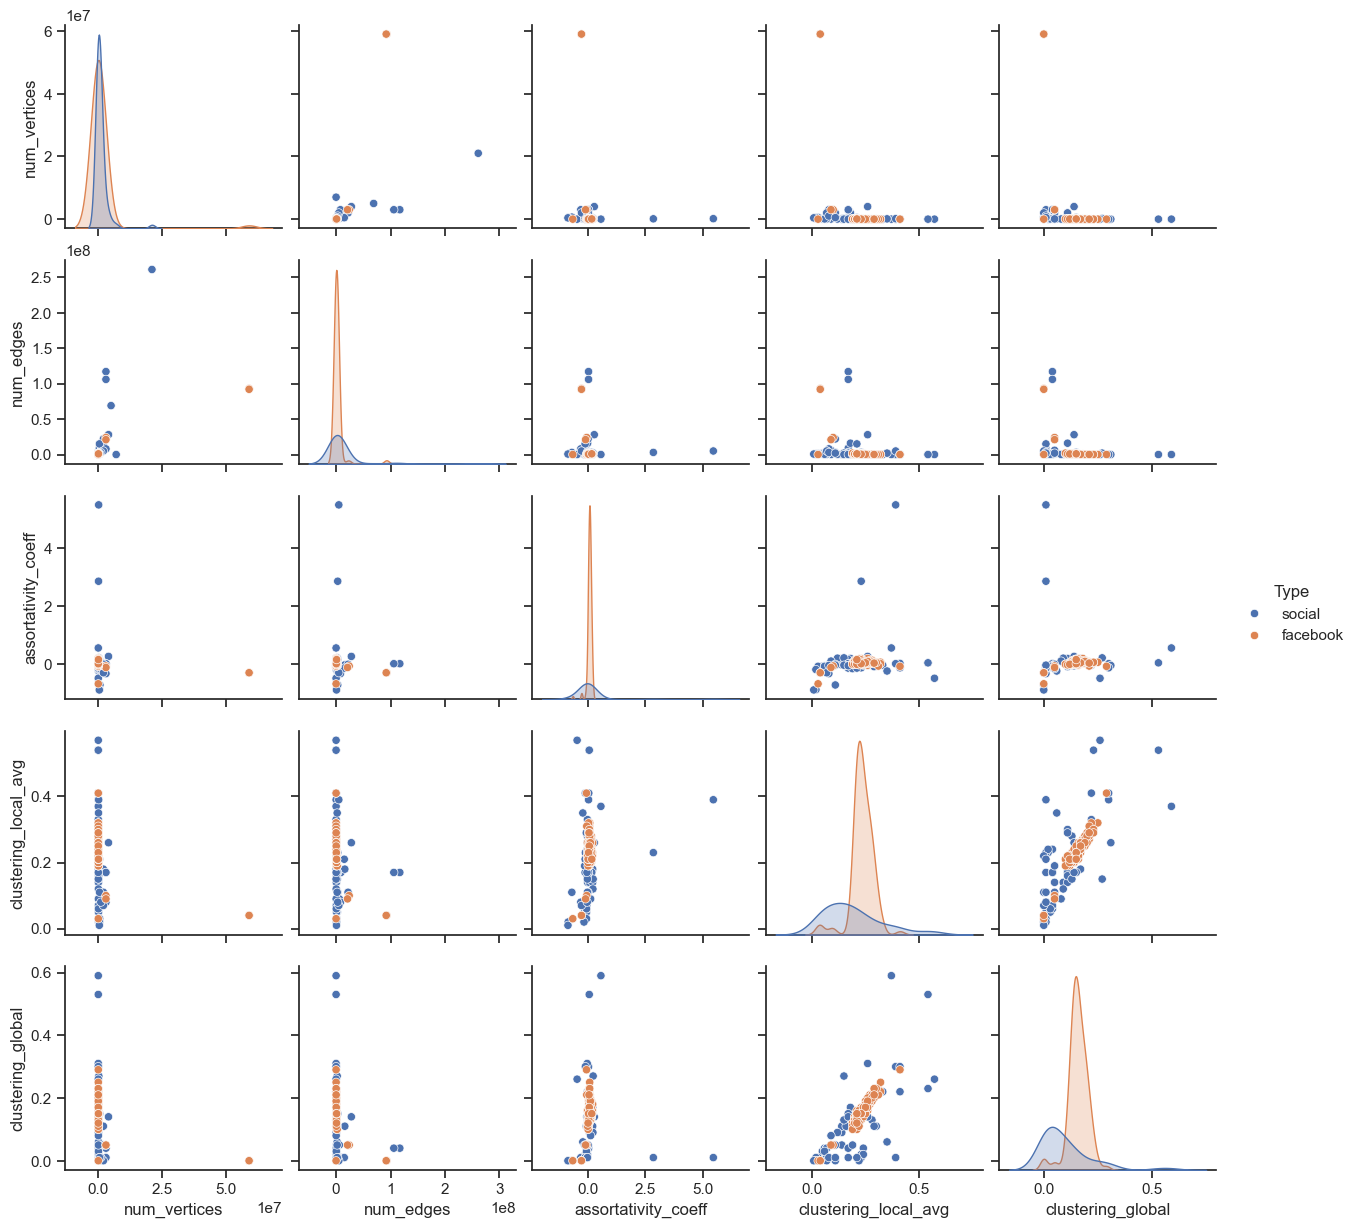

In [109]:
sns.pairplot(df,hue="Type",vars=['num_vertices','num_edges','assortativity_coeff','clustering_local_avg','clustering_global'])